In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
"""import sys
try:
    sys.path.insert(0, '/Users/sasha')
    from myrcparams import *
except ModuleNotFoundError:
    sys.path.insert(0, '/Users/sashasafonova')
    from myrcparams import *"""

Bad val "'w'" on line #108
	"patch.edgecolor        : 'w'   ## if forced, or patch is not filled
"
	in file "/Users/sasha/.matplotlib/matplotlibrc"
	Key patch.edgecolor: 'w' does not look like a color arg
Bad val '"regular"' on line #281
	"mathtext.default : "regular" ## The default font to use for math.
"
	in file "/Users/sasha/.matplotlib/matplotlibrc"
	Key mathtext.default: Unrecognized default string '"regular"': valid strings are ['rm', 'cal', 'it', 'tt', 'sf', 'bf', 'default', 'bb', 'frak', 'circled', 'scr', 'regular']


"import sys\ntry:\n    sys.path.insert(0, '/Users/sasha')\n    from myrcparams import *\nexcept ModuleNotFoundError:\n    sys.path.insert(0, '/Users/sashasafonova')\n    from myrcparams import *"

# Exercise 1

In [2]:
table_1 = np.array([[1, 201, 592, 61, 9, -0.84],
                    [2, 244, 401, 25, 4, 0.31],
                    [3, 47, 583, 38, 11, 0.64],
                    [4, 287, 402, 15, 7, -0.27],
                    [5, 203, 495, 21, 5, -0.33],
                    [6, 58, 173, 15, 9, 0.67],
                    [7, 210, 479, 27, 4, -0.02],
                    [8, 202, 504, 14, 4, -0.05],
                    [9, 198, 510, 30, 11, -0.84],
                    [10, 158, 416, 16, 7, -0.69],
                    [11, 165, 393, 14, 5, 0.30],
                    [12, 201, 442, 25, 5, -0.46],
                    [13, 157, 317, 52, 5, -0.03],
                    [14, 131, 311, 16, 6, 0.50],
                    [15, 166, 400, 34, 6, 0.73],
                    [16, 160, 337, 31, 5, -0.52],
                    [17, 186, 423, 42, 9, 0.90],
                    [18, 125, 334, 26, 8, 0.40],
                    [19, 218, 533, 16, 6, -0.78],
                    [20, 146, 344, 22, 5, -0.56]])
    
data = np.zeros(len(table_1), dtype={'names':('ID', 'x', 'y','sigma_y', 'sigma_x', 'rho_xy'),
                          'formats':('i4', 'f8', 'f8', 'f8', 'f8', 'f8')})

In [3]:
data['ID'] = table_1[:,0]
data['x'] = table_1[:,1]
data['y'] = table_1[:,2]
data['sigma_y'] = table_1[:,3]
data['sigma_x'] = table_1[:,4]
data['rho_xy'] = table_1[:,5]

In [4]:
ydata_1 = data['y'][4:]
xdata_1 = data['x'][4:]
sigma_y_1 = data['sigma_y'][4:]

In [5]:
def set_up_matrices(xdata, ydata, sigma_y):
    Y_mx = ydata
    A_mx = np.array([np.ones_like(Y_mx), xdata]).T
    C_mx = np.identity(len(sigma_y)) * sigma_y**2
    return Y_mx, A_mx, C_mx

def perform_linear_algebra_fit(xdata, ydata, sigma_y):
    Y_mx, A_mx, C_mx = set_up_matrices(xdata, ydata, sigma_y)
    
    covariance_mx = np.linalg.inv(np.linalg.multi_dot([A_mx.T, np.linalg.inv(C_mx), A_mx]))
    ACY = np.linalg.multi_dot([A_mx.T, np.linalg.inv(C_mx), Y_mx])
    
    # Get results of the linear algebra operation
    X_mx = covariance_mx.dot(ACY)
    intercept_m, slope_b = X_mx
    
    # Uncertainties
    intercept_m_err = np.sqrt(abs(covariance_mx))[0,0]
    slope_b_err = np.sqrt(covariance_mx[1,1])
    return slope_b, intercept_m, slope_b_err, intercept_m_err

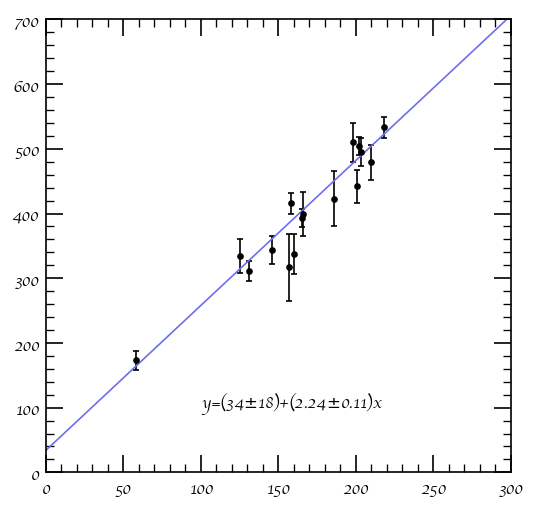

In [6]:
slope, intercept, slope_err, intercept_err = perform_linear_algebra_fit(xdata_1, ydata_1, sigma_y_1)

fig, axes = plt.subplots(figsize=(5,5), dpi=120)
axes.errorbar(xdata_1, ydata_1, yerr=sigma_y_1, fmt='.k')
axes.plot(range(0, 300), intercept + range(0, 300)*slope)
axes.text(100, 100, f"y=({intercept:0.0f}$\pm${intercept_err:0.0f})+({slope:0.2f}$\pm${slope_err:0.2f})x")
axes.set(xlim=(0, 300), ylim=(0,700));

# Exercise 2

In [7]:
xdata_2 = data['x']
ydata_2 = data['y']
sigma_y_2 = data['sigma_y']

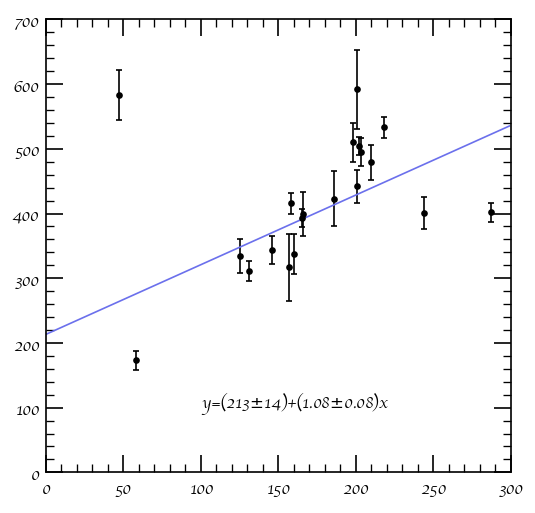

In [8]:
slope, intercept, slope_err, intercept_err = perform_linear_algebra_fit(xdata_2, ydata_2, sigma_y_2)

fig, axes = plt.subplots(figsize=(5,5), dpi=120)
axes.errorbar(xdata_2, ydata_2, yerr=sigma_y_2, fmt='.k')
axes.plot(range(0, 300), intercept + range(0, 300)*slope)
axes.text(100, 100, f"y=({intercept:0.0f}$\pm${intercept_err:0.0f})+({slope:0.2f}$\pm${slope_err:0.2f})x")
axes.set(xlim=(0, 300), ylim=(0,700));

# Exercise 3

In [9]:
def set_up_quad_matrices(xdata, ydata, sigma_y):
    Y_mx = ydata
    A_mx = np.array([np.ones_like(Y_mx), xdata, xdata**2]).T
    C_mx = np.identity(len(sigma_y)) * sigma_y**2
    return Y_mx, A_mx, C_mx

def perform_quad_fit(xdata, ydata, sigma_y):
    Y_mx, A_mx, C_mx = set_up_quad_matrices(xdata, ydata, sigma_y)
    
    covariance_mx = np.linalg.inv(np.linalg.multi_dot([A_mx.T, np.linalg.inv(C_mx), A_mx]))
    ACY = np.linalg.multi_dot([A_mx.T, np.linalg.inv(C_mx), Y_mx])
    
    # Get results of the linear algebra operation
    X_mx = covariance_mx.dot(ACY)
    intercept_m, slope_b, quad_coeff_q = X_mx
    
    # Uncertainties
    intercept_m_err = np.sqrt(abs(covariance_mx))[0,0]
    slope_b_err = np.sqrt(abs(covariance_mx))[1,1]
    quad_coeff_q_err = np.sqrt(abs(covariance_mx))[2,2]
    return slope_b, intercept_m, quad_coeff_q, slope_b_err, intercept_m_err, quad_coeff_q_err

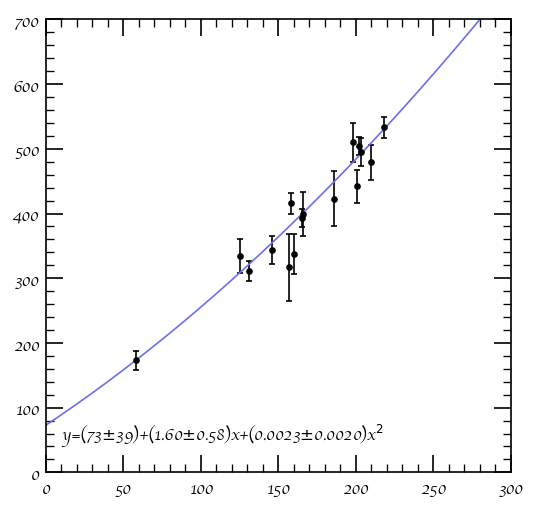

In [10]:
slope, intercept, quad_coeff, slope_err, intercept_err, quad_coeff_err = perform_quad_fit(xdata_1, ydata_1, sigma_y_1)

xline = np.arange(0, 300)
yline = intercept + xline*slope + xline**2 * quad_coeff

fig, axes = plt.subplots(figsize=(5,5), dpi=120)
axes.errorbar(xdata_1, ydata_1, yerr=sigma_y_1, fmt='.k')
axes.plot(xline, yline)
axes.text(10, 50, f"y=({intercept:0.0f}$\pm${intercept_err:0.0f})+({slope:0.2f}$\pm${slope_err:0.2f})x+({quad_coeff:0.4f}$\pm${quad_coeff_err:0.4f})x$^2$")
axes.set(xlim=(0, 300), ylim=(0,700));